# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [4]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\user\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


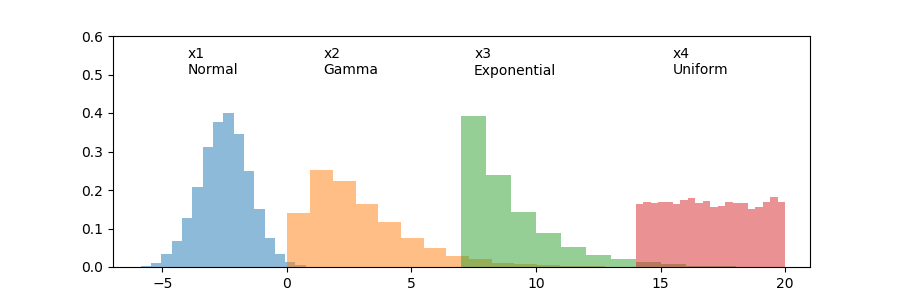

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


Text(15.494744342453085, 0.5, 'x4\nUniform')

In [5]:




# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


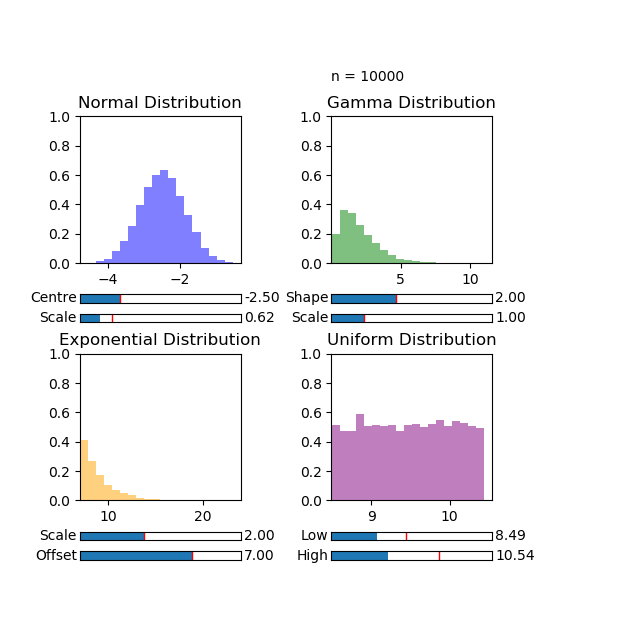

In [8]:
num_samples_to_draw = 1000
num_steps = 10
num_samples = num_samples_to_draw * num_steps

num_bins = 20

colors = ["blue","green","orange","purple"]

x_11=-2.5
x_12=1

x_21=2
x_22=1

x_31=2
x_32=7

x_41=14
x_42=20

d1=np.random.normal(x_11, x_12, 10000)
d2=np.random.gamma(x_21, x_22, 10000)
d3=np.random.exponential(x_31, 10000)+x_32
d4=np.random.uniform(x_41,x_42, 10000)

name_distr = ["Normal","Gamma","Exponential","Uniform"]
variables = [d1,d2,d3,d4]
bins_variables = [np.arange(np.min(x),np.max(x),(np.max(x)-np.min(x))/num_bins) for x in variables]
axes_variables = [[np.min(x),np.max(x),0,1] for x in variables]

def generateDistribution(i):
    global variables
    if i==0:
        variables[i] = np.random.normal(x_11, x_12, 10000)
    elif i==1:
        variables[i] = np.random.gamma(x_21, x_22, 10000)
    elif i==2:
        variables[i] = np.random.exponential(x_31, 10000)+x_32
    elif i==3:
        variables[i] = np.random.uniform(x_41,x_42, 10000)

def evaluateDistribution(i):
    global bins_variables
    global axes_variables
    generateDistribution(i)
    bins_variables[i] = np.arange(np.min(variables[i]),np.max(variables[i]),(np.max(variables[i])-np.min(variables[i]))/num_bins)
    axes_variables[i] = [np.min(variables[i]),np.max(variables[i]),0,1]

for i,distr in enumerate(name_distr):
    evaluateDistribution(i)

fig = plt.figure(figsize=[6.4,6.4])

height_menu=2
height_graph=16
height_slider=2
height_spacer=2

width=5

gspec = gridspec.GridSpec(height_menu+4*height_spacer+2*height_graph+4*height_slider, 2*width+2)

#ax5 = plt.subplot(gspec[0:height_menu-1,0:width-1])
ax6 = plt.subplot(gspec[0:height_menu-1,width+1:2*width])
ax6.axis('off')

start=height_menu

ax_spacer1 = plt.subplot(gspec[start:start+height_spacer-1,0:width-1])
ax_spacer1.axis('off')

start+=height_spacer

ax1 = plt.subplot(gspec[start:start+height_graph-1,0:width-1])
ax2 = plt.subplot(gspec[start:start+height_graph-1,width+1:2*width])

start+=height_graph

ax_spacer2 = plt.subplot(gspec[start:start+height_spacer-1,0:width-1])
ax_spacer2.axis('off')

start+=height_spacer

ax11 = plt.subplot(gspec[start:start+height_slider-1,0:width-1], alpha=0.25)
ax21 = plt.subplot(gspec[start:start+height_slider-1,width+1:2*width], alpha=0.25)

start+=height_slider

ax12 = plt.subplot(gspec[start:start+height_slider-1,0:width-1], alpha=0.25)
ax22 = plt.subplot(gspec[start:start+height_slider-1,width+1:2*width], alpha=0.25)

start+=height_slider

ax_spacer3 = plt.subplot(gspec[start:start+height_spacer-1,0:width-1])
ax_spacer3.axis('off')

start+=height_spacer

ax3 = plt.subplot(gspec[start:start+height_graph-1,0:width-1])
ax4 = plt.subplot(gspec[start:start+height_graph-1,width+1:2*width])

start+=height_graph

ax_spacer4 = plt.subplot(gspec[start:start+height_spacer-1,width+1:2*width])
ax_spacer4.axis('off')

start+=height_spacer

ax31 = plt.subplot(gspec[start:start+height_slider-1,0:width-1])
ax41 = plt.subplot(gspec[start:start+height_slider-1,width+1:2*width])

start+=height_slider

ax32 = plt.subplot(gspec[start:start+height_slider-1,0:width-1])
ax42 = plt.subplot(gspec[start:start+height_slider-1,width+1:2*width])

axs = [ax1,ax2,ax3,ax4]

sx11 = Slider(ax11, 'Centre', -5, 5, valinit=x_11)
sx12 = Slider(ax12, 'Scale', 0, 5, valinit=x_12)

sx21 = Slider(ax21, 'Shape', 0, 5, valinit=x_21)
sx22 = Slider(ax22, 'Scale', 0, 5, valinit=x_22)

sx31 = Slider(ax31, 'Scale', 0, 5, valinit=x_31)
sx32 = Slider(ax32, 'Offset', 0, 10, valinit=x_32)

sx41 = Slider(ax41, 'Low', 0, 30, valinit=x_41)
sx42 = Slider(ax42, 'High', 0, 30, valinit=x_42)

def updateNormalDistAndPlot(val):
    global x_11, x_12
    x_11 = sx11.val
    x_12 = sx12.val
    evaluateDistribution(0)
    updatePlotAxes(0,num_samples)
    
sx11.on_changed(updateNormalDistAndPlot)
sx12.on_changed(updateNormalDistAndPlot)

def updateGammaDistAndPlot(val):
    global x_21, x_22
    x_21 = sx21.val
    x_22 = sx22.val
    evaluateDistribution(1)
    updatePlotAxes(1,num_samples)

sx21.on_changed(updateGammaDistAndPlot)
sx22.on_changed(updateGammaDistAndPlot)

def updateExpDistAndPlot(val):
    global x_31,x_32
    x_31 = sx31.val
    x_32 = sx32.val
    evaluateDistribution(2)
    updatePlotAxes(2,num_samples)

sx31.on_changed(updateExpDistAndPlot)
sx32.on_changed(updateExpDistAndPlot)

def updateUniformDistAndPlot(val):
    global x_41,x_42
    x_41 = sx41.val
    x_42 = sx42.val
    if(x_42 < x_41):
        x_42 = x_41+2
        sx42.set_val(x_42)
    evaluateDistribution(3)
    updatePlotAxes(3,num_samples)

sx41.on_changed(updateUniformDistAndPlot)
sx42.on_changed(updateUniformDistAndPlot)

def updatePlotAxes(i, num):
    axs[i].cla()
    axs[i].set_title('{} Distribution'.format(name_distr[i]))
    axs[i].axis(axes_variables[i], True)
    axs[i].hist(variables[i][:num], normed=True, bins=bins_variables[i], color=colors[i], alpha=0.5)
    
def updatePlot(num):
    for i,x in enumerate(variables):
        updatePlotAxes(i,num)
    ax6.cla()
    ax6.axis('off')
    ax6.annotate('n = {}'.format(num),[0,0.5])
    
def animFunc(curr):
    if(curr >= num_steps):
        a.event_source.stop()
    updatePlot(curr*num_samples_to_draw)

#updatePlot(num_samples) 
a = animation.FuncAnimation(fig, animFunc, np.arange(1,num_steps+1,1), interval=500, repeat=False)